In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# Dropping Columns

In [5]:
columns_to_drop = ['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item']
df.drop(columns=columns_to_drop, inplace=True)

# Changing data-types

In [6]:
df['rate'] = df['rate'].str.replace('/5', '')  # Remove "/5" suffix
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Convert to numeric, setting non-numeric values to NaN

In [7]:
df['online_order'] = df['online_order'].astype('category')
df['book_table'] = df['book_table'].astype('category')
df['listed_in(type)'] = df['listed_in(type)'].astype('category')
df['listed_in(city)'] = df['listed_in(city)'].astype('category')

In [8]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Missing Values Treatment

In [9]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
#Treatment of rate column

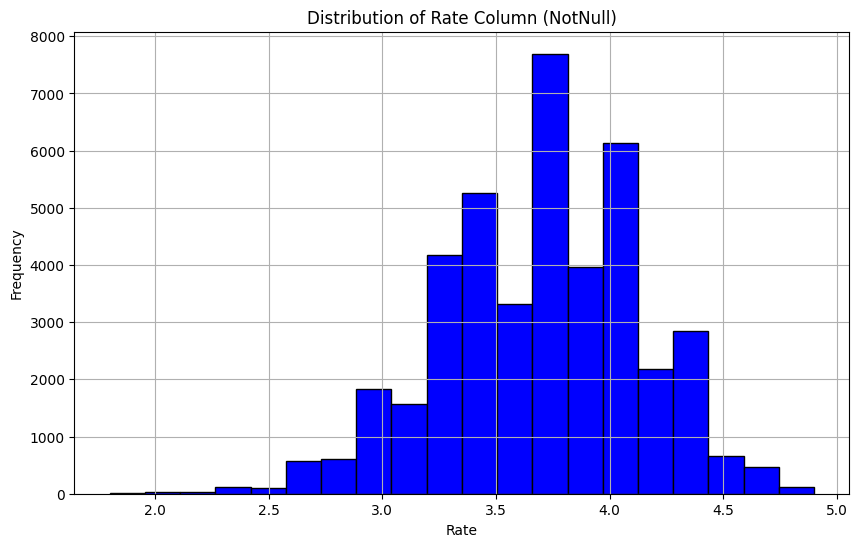

In [10]:
df_not_null_rate = df[df['rate'].notnull()]
plt.figure(figsize=(10, 6))
plt.hist(df_not_null_rate['rate'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Rate Column (NotNull)')
plt.grid(True)
plt.show()

In [11]:
skewness = skew(df_not_null_rate['rate'])
print("Skewness of 'rate' column:", skewness)

Skewness of 'rate' column: -0.32858896795804243


In [12]:
rate_mean = df['rate'].mean()
df['rate'].fillna(rate_mean, inplace=True)

In [13]:
columns_with_null = ['location', 'rest_type', 'cuisines', 'approx_cost(for two people)']
df.dropna(subset=columns_with_null, inplace=True)

In [ ]:
#Checking for duplicate records

In [14]:
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 106


In [15]:
df.drop_duplicates(inplace=True)

# EDA(Exploratory Data Analysis) On Target Variable

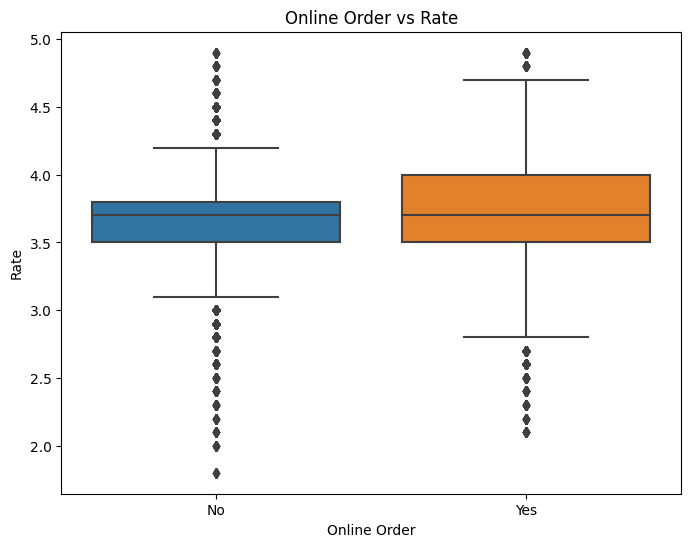

In [18]:
# Box plot for 'rate'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='online_order', y='rate')
plt.title("Online Order vs Rate")
plt.xlabel("Online Order")
plt.ylabel("Rate")
plt.show()

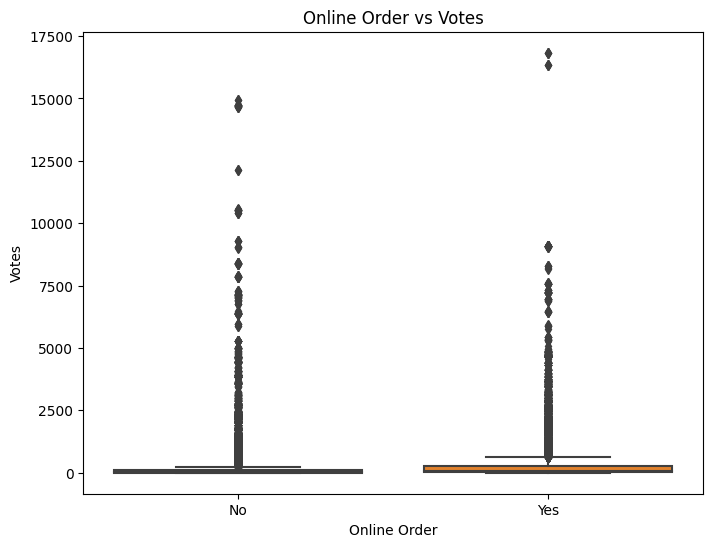

In [19]:
# Box plot for 'votes'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='online_order', y='votes')
plt.title("Online Order vs Votes")
plt.xlabel("Online Order")
plt.ylabel("Votes")
plt.show()

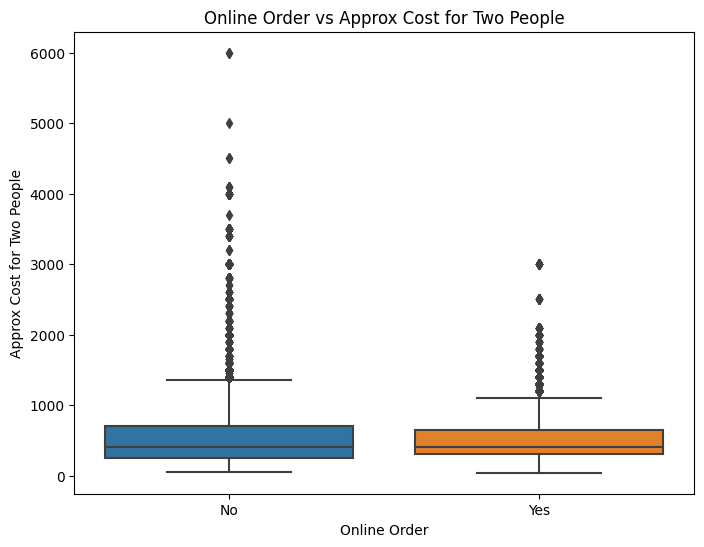

In [25]:
# Box plot for 'approx_cost(for two people)'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='online_order', y='approx_cost(for two people)')
plt.title("Online Order vs Approx Cost for Two People")
plt.xlabel("Online Order")
plt.ylabel("Approx Cost for Two People")
plt.show()

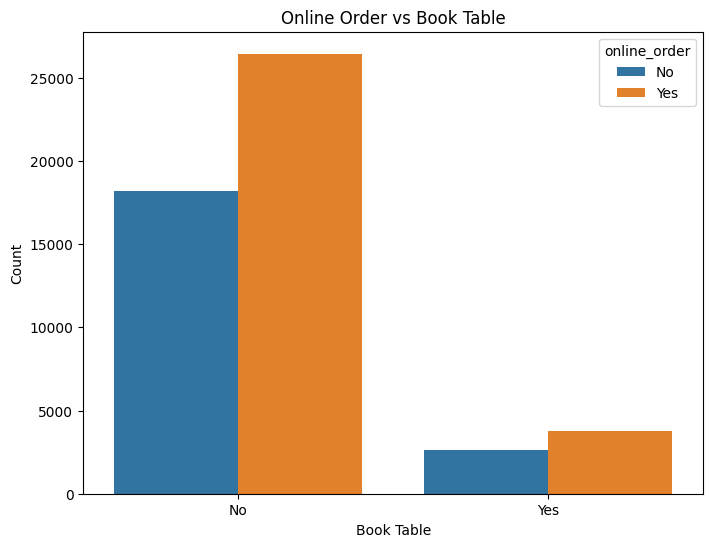

In [20]:
# Bar plot for 'book_table'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='book_table', hue='online_order')
plt.title("Online Order vs Book Table")
plt.xlabel("Book Table")
plt.ylabel("Count")
plt.show()

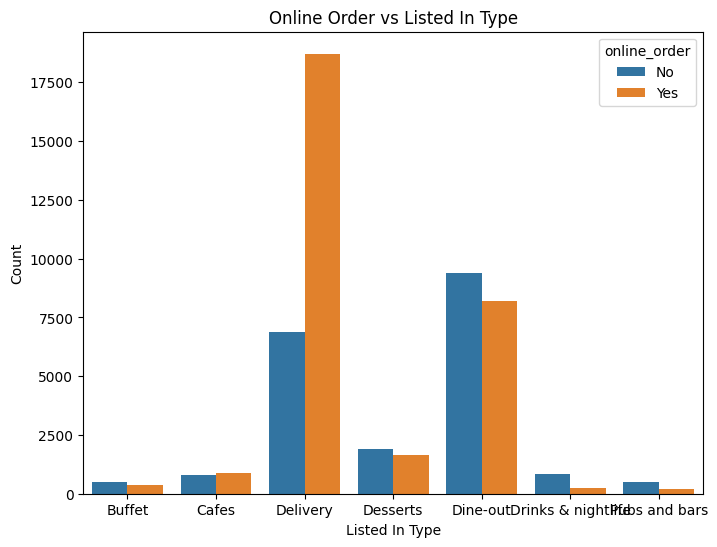

In [21]:
# Bar plot for 'listed_in(type)'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='listed_in(type)', hue='online_order')
plt.title("Online Order vs Listed In Type")
plt.xlabel("Listed In Type")
plt.ylabel("Count")
plt.show()


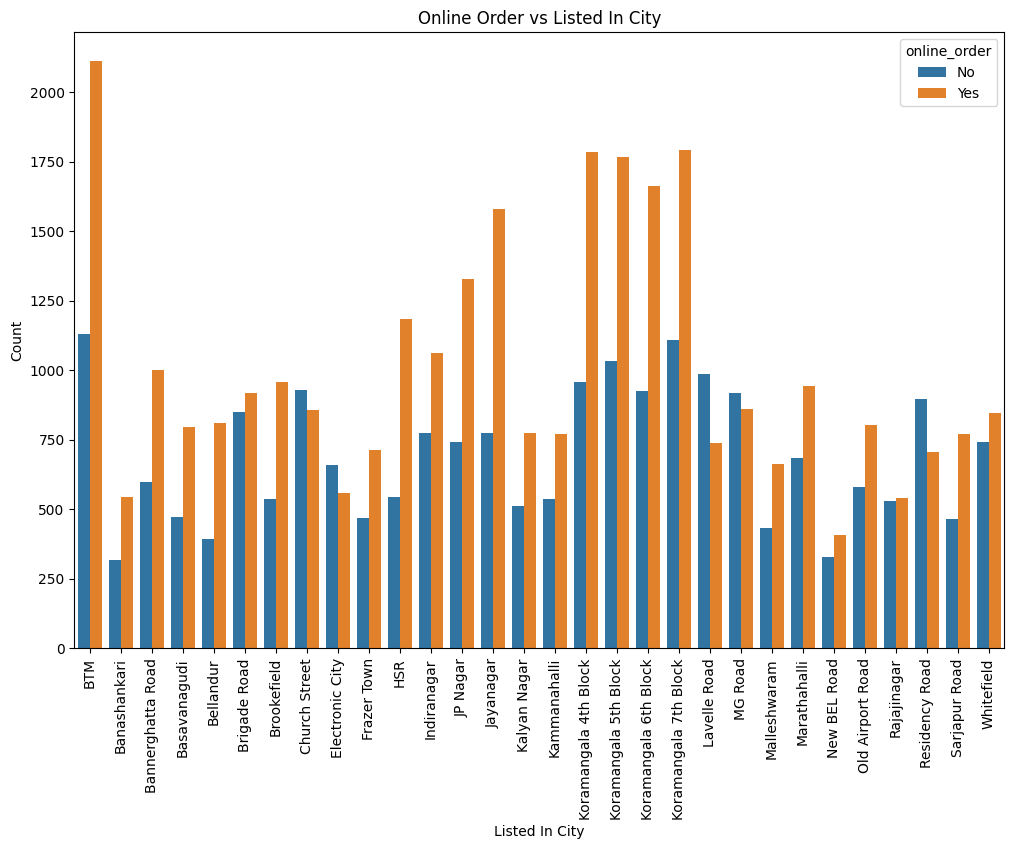

In [22]:
# Bar plot for 'listed_in(city)'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='listed_in(city)', hue='online_order')
plt.title("Online Order vs Listed In City")
plt.xlabel("Listed In City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

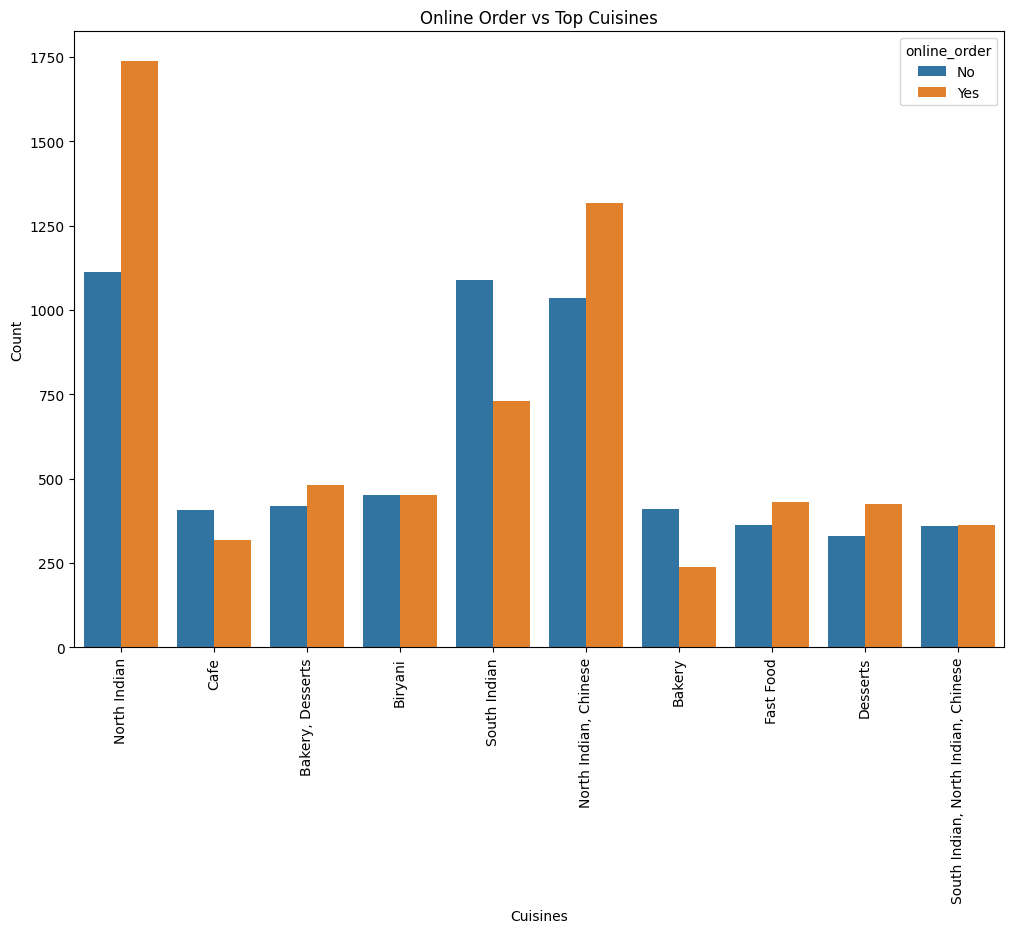

In [24]:
# Extract the top cuisines
top_cuisines = df['cuisines'].value_counts().head(10).index

# Bar plot for top cuisines
plt.figure(figsize=(12, 8))
sns.countplot(data=df[df['cuisines'].isin(top_cuisines)], x='cuisines', hue='online_order')
plt.title("Online Order vs Top Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Statistical test